# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
306217               2020-08-01           2020-07-26            2020-07-15   
306218               2020-08-01           2020-07-26            2020-07-15   
306219               2020-08-01           2020-07-26            2020-07-15   
306220               2020-08-01           2020-07-21            2020-07-10   
306221               2020-08-01           2020-07-24            2020-07-13   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
306217             2020-07-11 00:00:00                   NaT   
306218             2020-07-11 00:00:00                   NaT   
306219             2020-07-11 00:00:00                   NaT   
306220             2020-07-06 00:00:00                   NaT   
306221             2020-07-09 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación        Departamento  \
Id de caso                                                               
1                         NaT          Bogotá d.c.         Bogotá D.C.   
2                         NaT  Guadalajara de buga     Valle del Cauca   
3                         NaT             Medellín           Antioquia   
4                         NaT             Medellín           Antioquia   
5                         NaT             Medellín           Antioquia   
...                       ...                  ...                 ...   
306217                    NaT                Ocaña  Norte de Santander   
306218                    NaT             Pamplona  Norte de Santander   
306219                    NaT               Cúcuta  Norte de Santander   
306220                    NaT               Cúcuta  Norte de Santander   
306221                    NaT             Rionegro           Antioquia   

           Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                        ...                              
1               Leve  Recuperado  ...               10 - 20    F   
2               Leve  Recuperado  ...               30 - 40    M   
3               Leve  Recuperado  ...               40 - 50    F   
4               Leve  Recuperado  ...               50 - 60    M   
5               Leve  Recuperado  ...               20 - 30    M   
...              ...         ...  ...                   ...  ...   
306217          Leve        Casa  ...               20 - 30    F   
306218          Leve        Casa  ...               20 - 30    F   
306219          Leve        Casa  ...               70 - 80    M   
306220          Leve        Casa  ...                0 - 10    M   
306221          Leve        Casa  ...                0 - 10    M   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro                 NaN    Imp

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1057   1454
Antioquia                                           16210  19536
Arauca                                                 52    167
Archipiélago de San Andrés Providencia y Santa ...     12     26
Atlántico                                           10876  12193
Barranquilla D.E.                                   13928  16134
Bogotá D.C.                                         51394  53262
Bolívar                                              1162   1492
Boyacá                                                536    557
Buenaventura D.E.                                     787   1328
Caldas                                                504    485
Caquetá                                               543    573
Cartagena D.T. y C.                                  7213   8720
Casanare                                              132    183
Cauca                                                 872   1099
Cesar                                                1463   1888
Chocó                                                1371   1650
Cundinamarca                                         4460   4518
Córdoba                                              2862   2963
Guainía                                                 6      8
Guaviare                                               11     88
Huila                                                 465    485
La Guajira                                           1045   1111
Magdalena                                            1073   1147
Meta                                                  762   2087
Nariño                                               3745   4345
Norte de Santander                                   1056   1448
Putumayo                                              421    522
Quindío                                               187    177
Risaralda                                             946    857
Santa Marta D.T. y C.                                2061   2250
Santander                                            1650   2343
Sucre                                                2746   3256
Tolima                                                901   1744
Valle del Cauca                                     11065  12448
Vaupés                                                 27     34
Vichada                                                 1      1

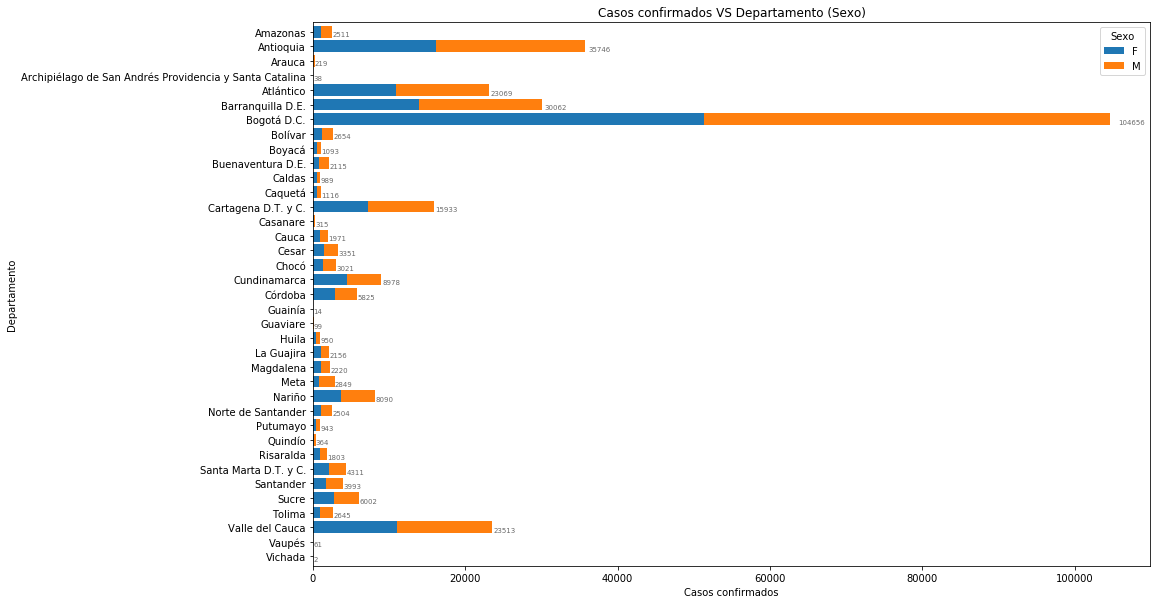

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               133      452      510   
Antioquia                                             1161     2506     9483   
Arauca                                                   9       42       81   
Archipiélago de San Andrés Providencia y Santa ...       0        1       10   
Atlántico                                             1027     1798     4961   
Barranquilla D.E.                                     1154     1948     6568   
Bogotá D.C.                                           4564     7971    23994   
Bolívar                                                126      259      611   
Boyacá                                                  60      101      230   
Buenaventura D.E.                                       46      281      484   
Caldas                                                  36       65      221   
Caquetá                                                 35       62      317   
Cartagena D.T. y C.                                    718     1185     3639   
Casanare                                                14       16       92   
Cauca                                                   91      167      471   
Cesar                                                  216      297      793   
Chocó                                                  127      262      714   
Cundinamarca                                           423      662     2091   
Córdoba                                                187      317     1210   
Guainía                                                  0        2        4   
Guaviare                                                 1       31       22   
Huila                                                   54       93      202   
La Guajira                                             114      210      458   
Magdalena                                              120      159      410   
Meta                                                    60      242      891   
Nariño                                                 371      688     1873   
Norte de Santander                                      80      103      582   
Putumayo                                                31       70      272   
Quindío                                                 13       20       77   
Risaralda                                              113      162      396   
Santa Marta D.T. y C.                                  170      290      963   
Santander                                              143      269      921   
Sucre                                                  236      477     1249   
Tolima                                                 112      156      770   
Valle del Cauca                                        793     1577     5411   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                481      342      274   
Antioquia                                              9027     5580     4214   
Arauca                                                   54       18        7   
Archipiélago de San Andrés Providencia y Santa ...       11        9        4   
Atlántico                                              5335     3677     3008   
Barranquilla D.E.                                      7129     4688     4054   
Bogotá D.C.                                           23194    16915    14133   
Bolívar                                                 618      375      236   
Boyacá                                                  211      176 

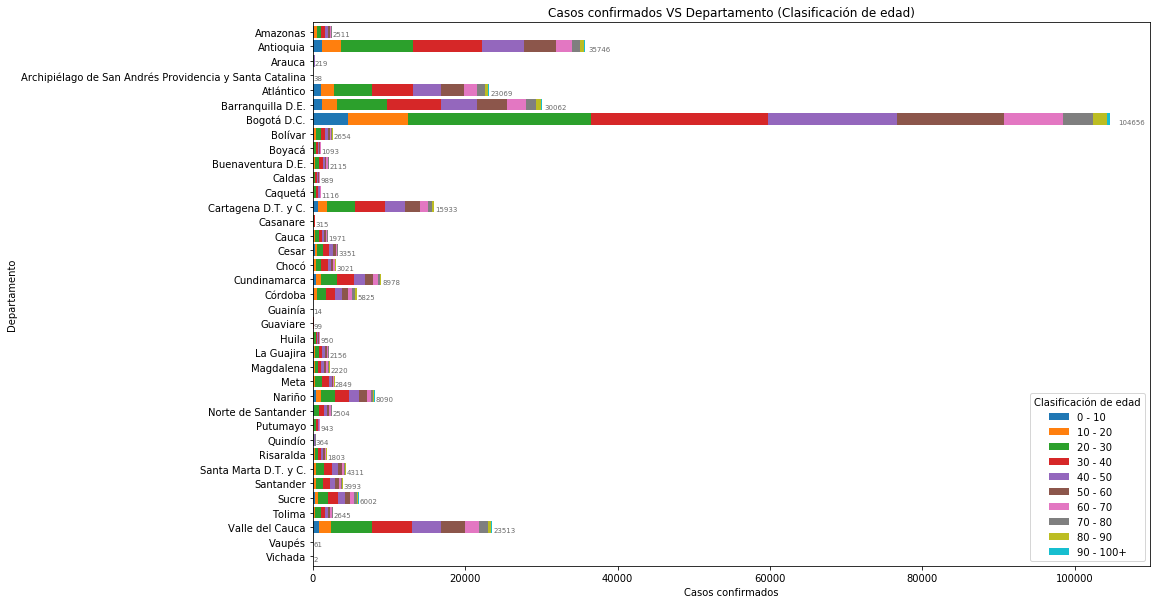

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               54.0      102.0   
Antioquia                                           22612.0      537.0   
Arauca                                                 63.0        3.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            4902.0     1062.0   
Barranquilla D.E.                                    5346.0     1483.0   
Bogotá D.C.                                         47407.0     2828.0   
Bolívar                                               963.0      123.0   
Boyacá                                                476.0       29.0   
Buenaventura D.E.                                     254.0      143.0   
Caldas                                                622.0       12.0   
Caquetá                                               765.0       23.0   
Cartagena D.T. y C.                                  2931.0      472.0   
Casanare                                              157.0        5.0   
Cauca                                                 842.0       64.0   
Cesar                                                1435.0       63.0   
Chocó                                                 538.0      102.0   
Cundinamarca                                         3595.0      239.0   
Córdoba                                              2513.0      665.0   
Guainía                                                 0.0        1.0   
Guaviare                                               48.0        0.0   
Huila                                                 432.0       26.0   
La Guajira                                            769.0      122.0   
Magdalena                                             521.0      211.0   
Meta                                                  946.0       36.0   
Nariño                                               2682.0      261.0   
Norte de Santander                                   1525.0      113.0   
Putumayo                                              634.0       38.0   
Quindío                                               137.0        8.0   
Risaralda                                             942.0       29.0   
Santa Marta D.T. y C.                                1660.0      157.0   
Santander                                            2085.0      110.0   
Sucre                                                1924.0      372.0   
Tolima                                                930.0       53.0   
Valle del Cauca                                      7984.0      837.0   
Vaupés                                                  7.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 6.0           4.0   
Antioquia                                             1419.0         174.0   
Arauca                                                  10.0           3.0   
Archipiélago de San Andrés Providencia y Santa ...       1.0           1.0   
Atlántico                                              654.0         101.0   
Barranquilla D.E.                                      739.0          80.0   
Bogotá D.C.                                           5314.0         322.0   
Bolívar                                                107.0          11.0   
Boyacá                                                  65.0           7.0   
Buenaventura D.E.                                      107.0          25.0   
Caldas                                                  35.0          12.0   
Caquetá                                                 89.0           6.0   
Cartagena D.T. y C.  

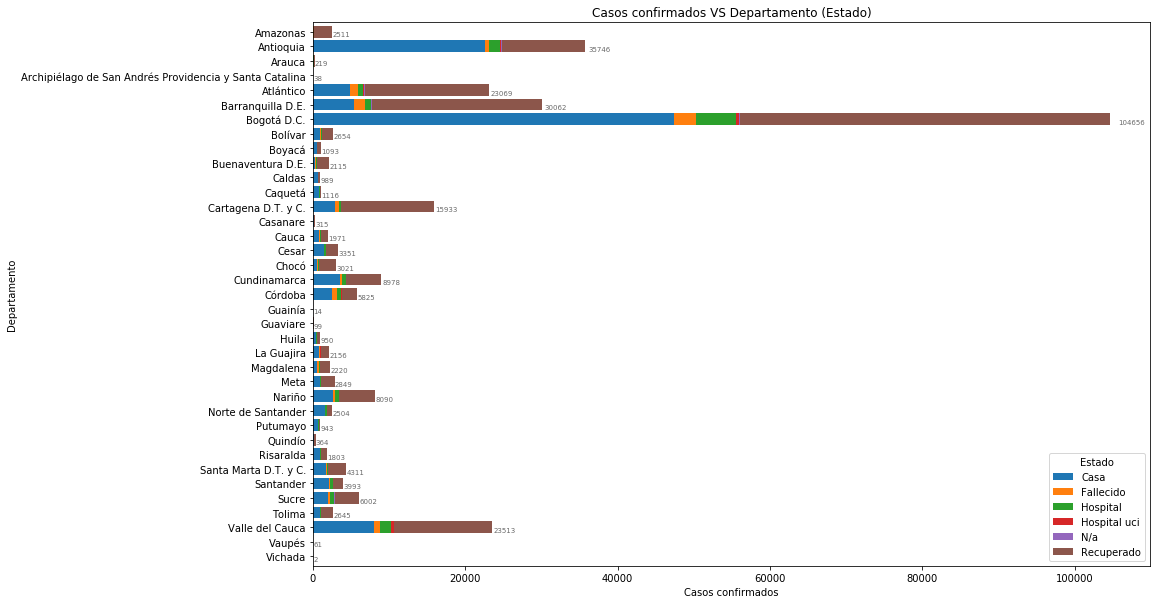

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          57335  61372
Fallecido      3737   6593
Hospital       6062   8145
Hospital uci    546   1038
N/a             277    368
Recuperado    75645  85063

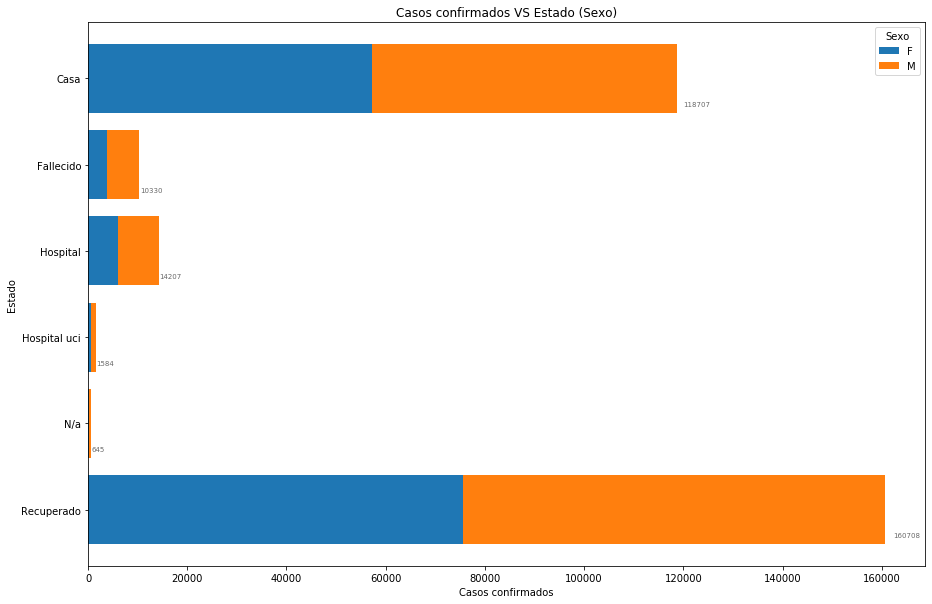

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     4664     9231    29752    29325    19423    14573   
Fallecido                  23       19      146      357      816     1566   
Hospital                  568      289     1047     1645     2088     2916   
Hospital uci               74       27       59      166      230      375   
N/a                        18       14       30       28       50       77   
Recuperado               7195    13367    39966    39366    25601    19549   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      7066     3160     1288        225  
Fallecido                 2446     2572     1940        445  
Hospital                  2811     1847      879        117  
Hospital uci               364      222       62          5  
N/a                        128      139      126         35  
Recuperado                9567     4206     1628        263

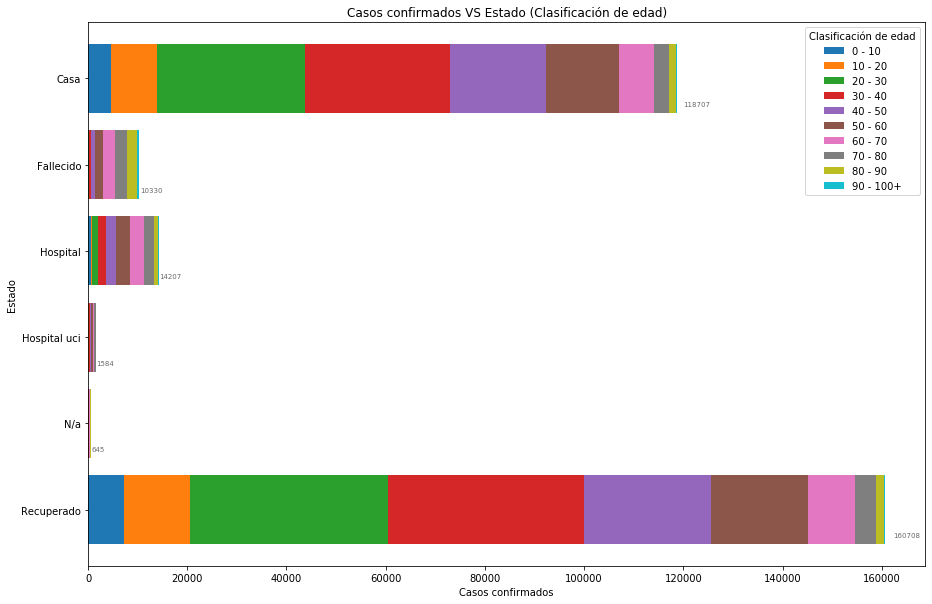

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   136868  147593
Importado       455     520
Relacionado    6279   14466

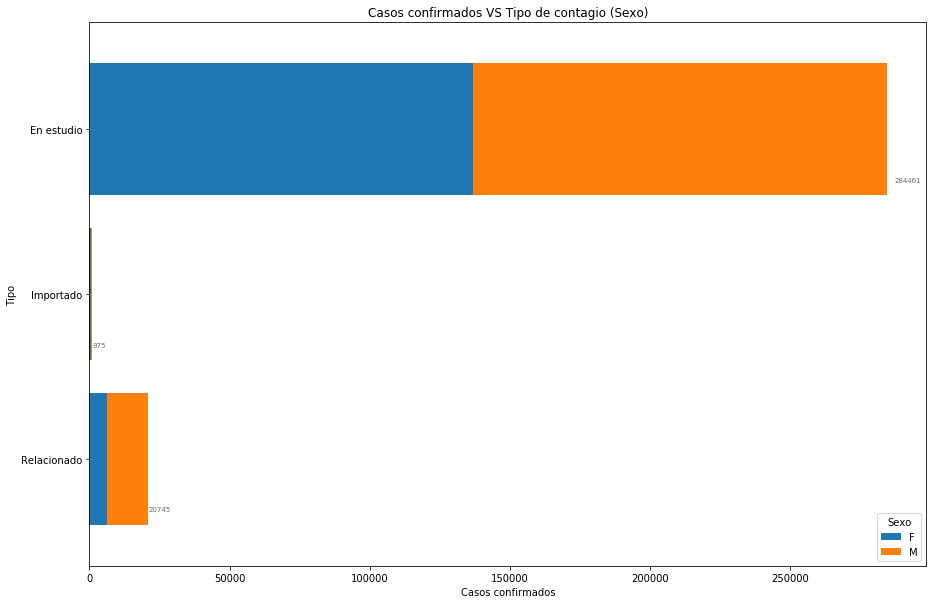

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              11625    20438    65060    65659    45243    36908   
Importado                   6       37      240      230      173      150   
Relacionado               911     2472     5700     4998     2792     1998   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               21259    11622     5625       1022  
Importado                   94       35        9          1  
Relacionado               1029      489      289         67

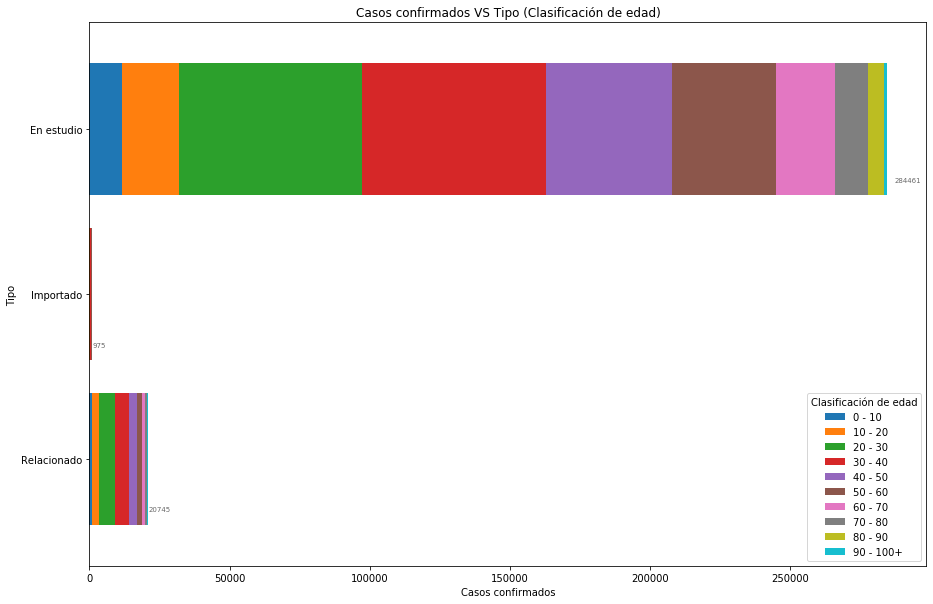

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  6168   6374
10 - 20                10609  12338
20 - 30                33996  37004
30 - 40                32654  38233
40 - 50                22633  25575
50 - 60                18205  20851
60 - 70                10277  12105
70 - 80                 5509   6637
80 - 90                 2926   2997
90 - 100+                625    465

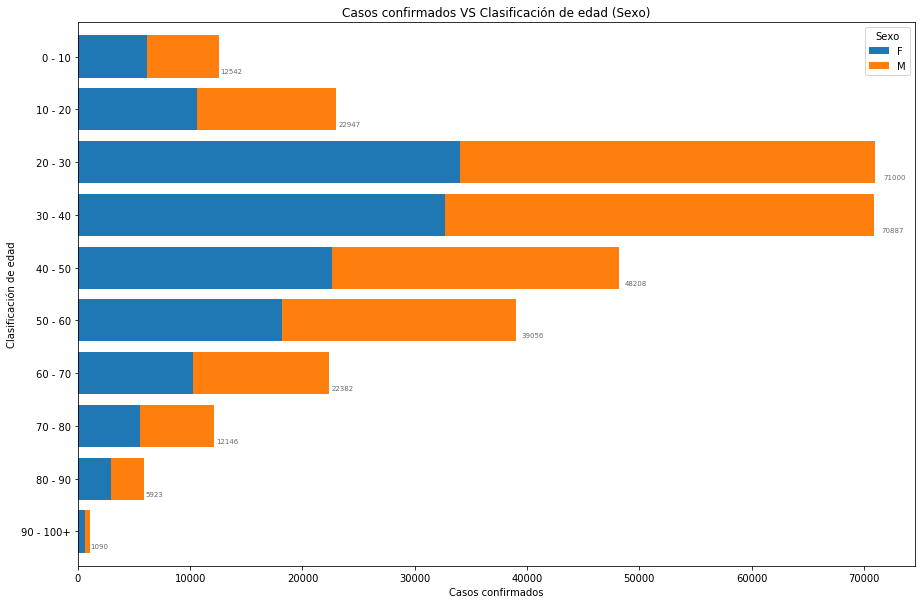

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  4664         23       568            74   18   
10 - 20                 9231         19       289            27   14   
20 - 30                29752        146      1047            59   30   
30 - 40                29325        357      1645           166   28   
40 - 50                19423        816      2088           230   50   
50 - 60                14573       1566      2916           375   77   
60 - 70                 7066       2446      2811           364  128   
70 - 80                 3160       2572      1847           222  139   
80 - 90                 1288       1940       879            62  126   
90 - 100+                225        445       117             5   35   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       7195  
10 - 20                     13367  
20 - 30                     39966  
30 - 40                     39366  
40 - 50                     25601  
50 - 60                     19549  
60 - 70                      9567  
70 - 80                      4206  
80 - 90                      1628  
90 - 100+                     263

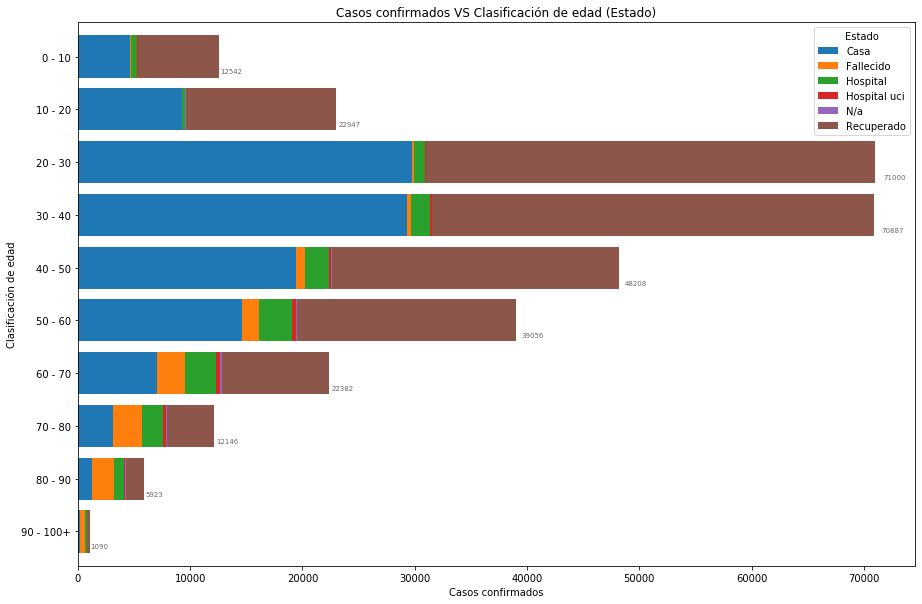

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-28            6119.0  6482.0
2020-07-29            3924.0  3963.0
2020-07-30            3834.0  4040.0
2020-07-31            1957.0  1813.0
2020-08-01            2283.0  2370.0

[146 rows x 2 columns]

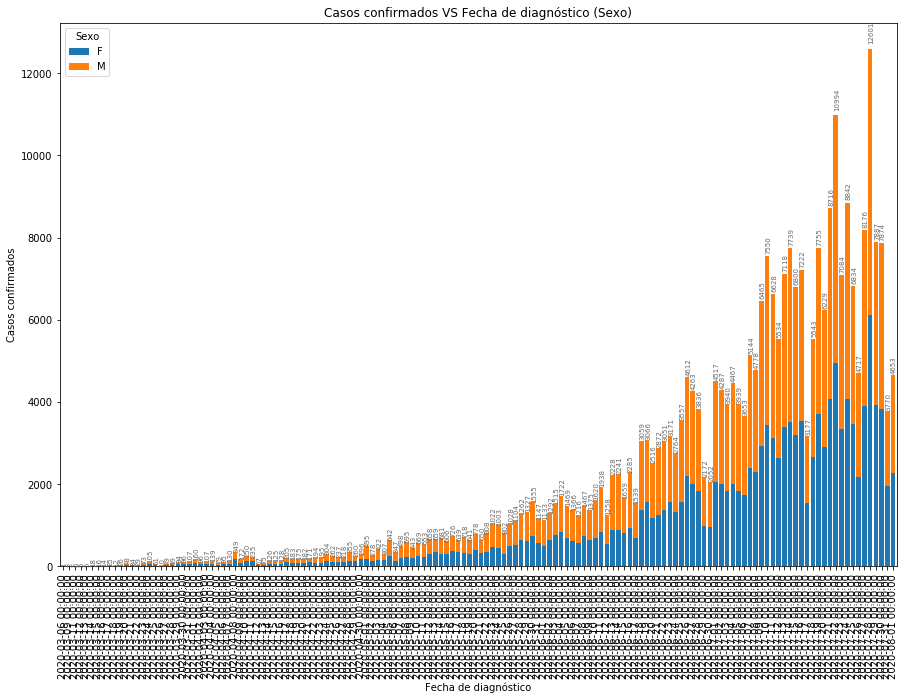

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-28                520      943     2876     2840     1996     1700   
2020-07-29                284      531     1895     1909     1323      956   
2020-07-30                307      630     1946     1890     1154     1007   
2020-07-31                136      223      852      905      664      463   
2020-08-01                171      361     1133     1162      750      567   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-28                 892      537      246         51  
2020-07-29                 554      263      145         27  
2020-07-30                 495      289      130         26  
2020-07-31                 258      185       75          9  
2020-08-01                 273      154       70         12  

[146 rows x 10 columns]

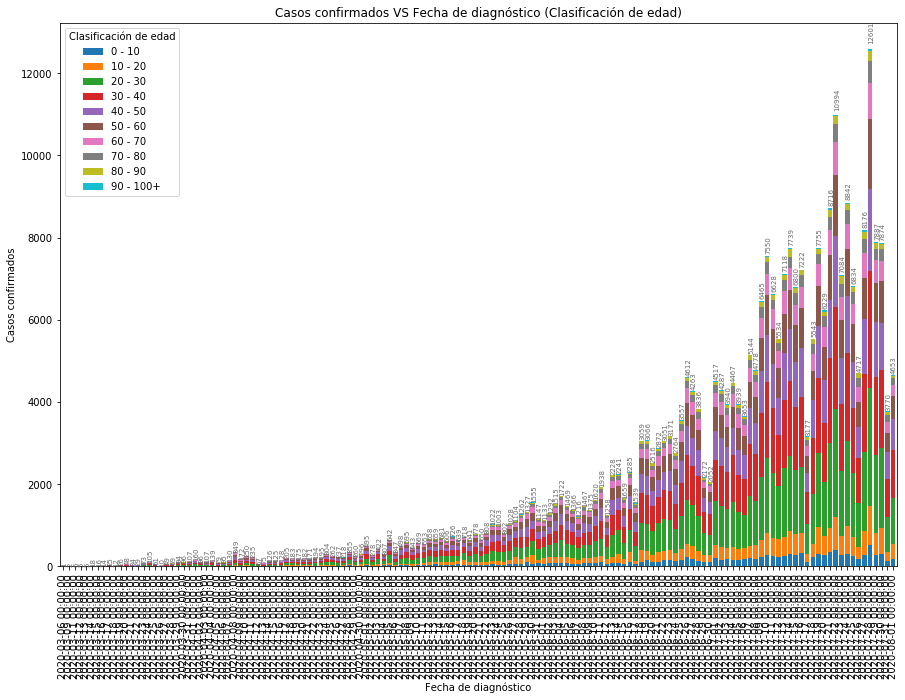

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                   Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                     
2020-03-06                0.0        0.0       0.0           0.0   0.0   
2020-03-09                0.0        0.0       0.0           0.0   0.0   
2020-03-11                0.0        0.0       0.0           0.0   0.0   
2020-03-12                0.0        0.0       0.0           0.0   0.0   
2020-03-13                0.0        0.0       0.0           0.0   0.0   
...                       ...        ...       ...           ...   ...   
2020-07-28            10949.0      258.0     760.0          41.0  15.0   
2020-07-29             7226.0      105.0     399.0          31.0  10.0   
2020-07-30             7301.0       71.0     409.0          32.0   4.0   
2020-07-31             3382.0        1.0     355.0          30.0   0.0   
2020-08-01             4405.0        0.0     240.0           8.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-28                 578.0  
2020-07-29                 116.0  
2020-07-30                  57.0  
2020-07-31                   2.0  
2020-08-01                   0.0  

[146 rows x 6 columns]

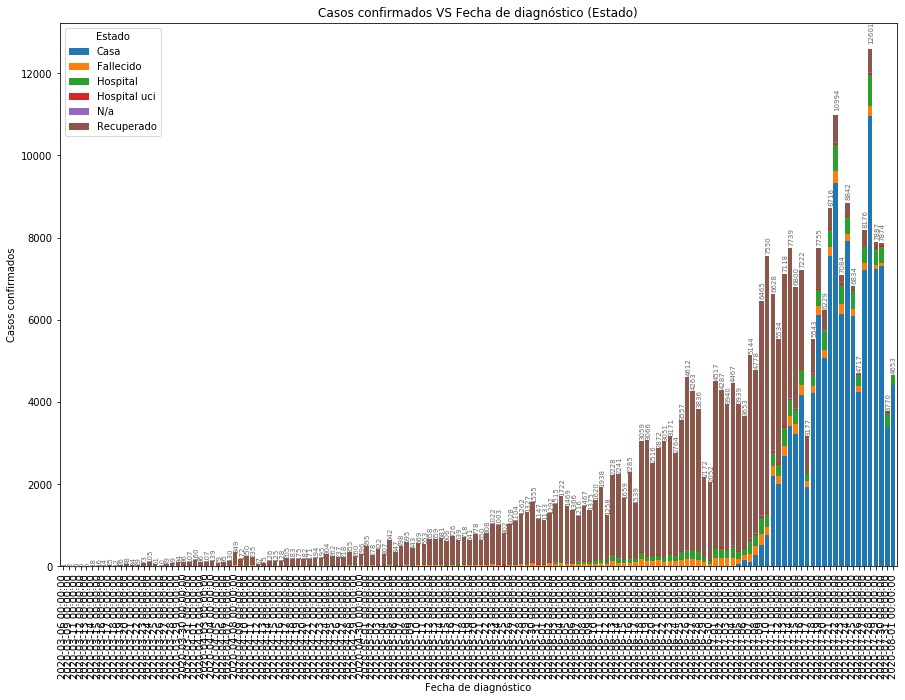

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-07-28            129819.0  148382.0
2020-07-29            133743.0  152345.0
2020-07-30            137577.0  156385.0
2020-07-31            139534.0  158198.0
2020-08-01            141817.0  160568.0

[146 rows x 2 columns]

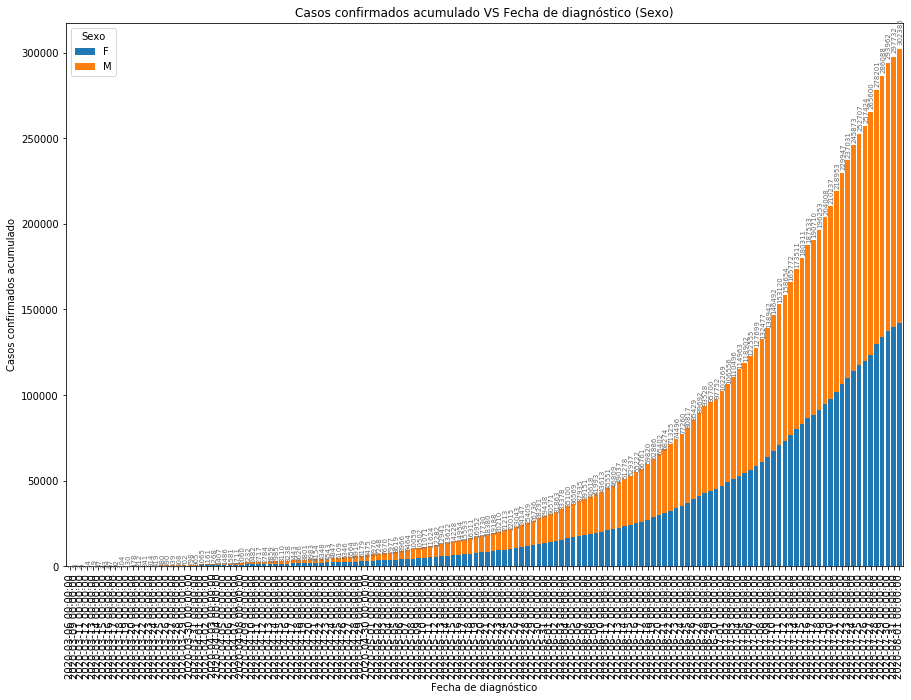

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-28              11511    20925    64268    64107    43761    35599   
2020-07-29              11795    21456    66163    66016    45084    36555   
2020-07-30              12102    22086    68109    67906    46238    37562   
2020-07-31              12238    22309    68961    68811    46902    38025   
2020-08-01              12409    22670    70094    69973    47652    38592   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-28               20510    11096     5418       1006  
2020-07-29               21064    11359     5563       1033  
2020-07-30               21559    11648     5693       1059  
2020-07-31               21817    11833     5768       1068  
2020-08-01               22090    11987     5838       1080  

[146 rows x 10 columns]

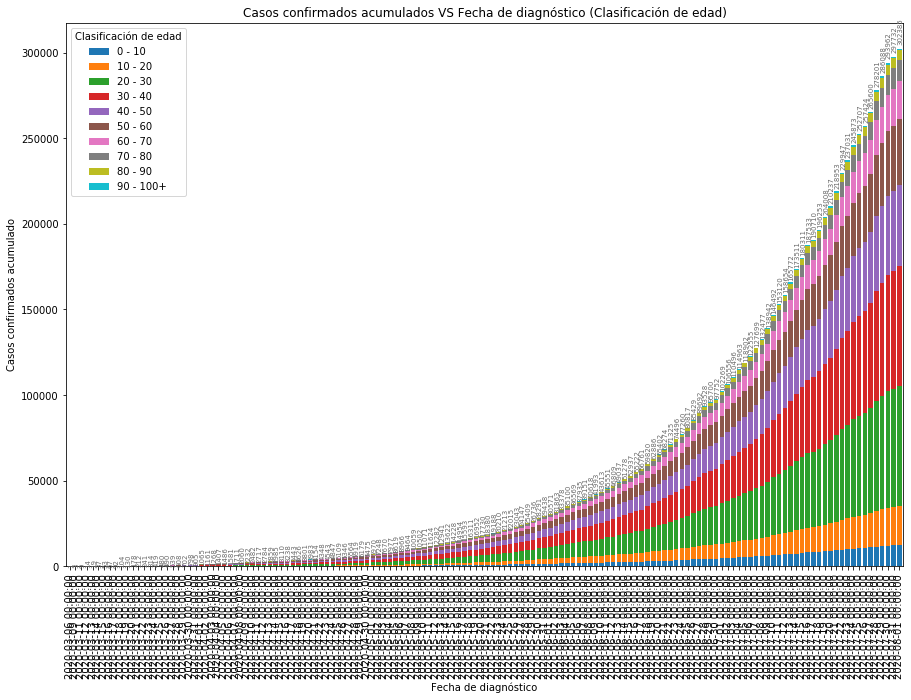

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-07-28             96348.0     9964.0   12666.0        1455.0  610.0   
2020-07-29            103574.0    10069.0   13065.0        1486.0  620.0   
2020-07-30            110875.0    10140.0   13474.0        1518.0  624.0   
2020-07-31            114257.0    10141.0   13829.0        1548.0  624.0   
2020-08-01            118662.0    10141.0   14069.0        1556.0  624.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-28              157158.0  
2020-07-29              157274.0  
2020-07-30              157331.0  
2020-07-31              157333.0  
2020-08-01              157333.0  

[146 rows x 6 columns]

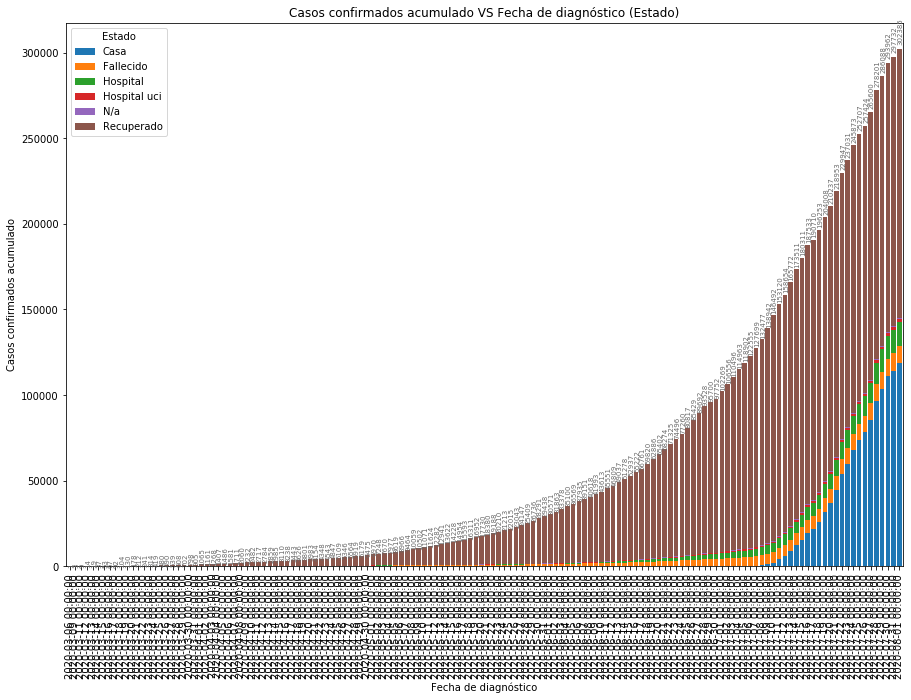

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>